**Вейвлеты** объединяют в себе два важных свойства подобия и
выраженную локализацию в пространстве и времени.

<!-- Чтобы быть вейвлетами семейство функций должно
удовлетворять следующим требованиям:

**1. Допустимость**

Анализирующий вейвлет $y(t)$, называемый
также материнским вейвлетом, должен иметь нулевое
среднее значение: $\int^{+\infin}_{-\infin}\psi (t) *dt = 0$.

**2. Подобие**

Все функции семейства получаются из анализирующего
вейвлета путем масштабного преобразования и сдвига: $\psi_{a,b}(\frac{t-b}{a})$

Получается двухпараметрическое семейство функций:
параметр $a$ - масштаб (растяжение) функции, параметр $b$ -
положение (сдвиг) функции.

**3. Обратимость**

Существование обратного преобразования,
однозначно восстанавливающее исходную функцию по ее
вейвлет - преобразованию.

**4. Регулярность**

Функция $y(t)$ должна быть хорошо
локализована и в физическом пространстве и в пространстве Фурье. -->

Ключевое отличие предназначения вейвлетов от фильтров — они демонстрируют изменения фукнции во временной области ("дают возможность наблюдать, как частоты меняются во времени"). Например, пусть фукнция описывает синусоиду и при этом линейно растёт по оси Y — в этом случае вейвлет покажет не только какие частоты присутствуют в сигнале, как это сделал бы фильтр, но и когда они там возникают или исчезают.

[Простыня про вейвлеты от гптшки](https://pastebin.com/7PakP3Ap)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from pydub import AudioSegment
from scipy.io import wavfile

**(1)** Реализовать вейвлет Морле во временном <!-- пространстве: $\large{\psi(t) = e^{-\frac{t^2}{\alpha^2}} * e^{i \omega_0 t}}$ И --> и в частотном пространстве: <!-- $\large{\hat{\psi}(\omega) = \alpha * \sqrt{\pi} * e^{-\alpha^2 * \frac{(\omega - \omega_0)^2}{4}}}$ -->

- `alpha` — ширина гауссиана $\alpha$ (обычно $\alpha^2 = 2 \to \alpha = \sqrt{2}$)
- `k_0` — частота плоской волны $w_0$ (обычно $w_0 = 2$)

In [2]:
def morlet4time(t, alpha, k_0):
    # return np.exp(-t**2 / alpha**2) * ((np.exp(1j * k_0 * t) - np.exp(-k_0**2 * alpha**2) / 4)) # <-- Из лекции
    return np.exp(-(t**2 / alpha**2)) * np.exp(1j * k_0 * t) # <-- Из лабораторной, более частный случай

In [3]:
def morlet4freq(w, alpha, k_0):
    # return alpha * np.sqrt(np.pi) * (np.exp(-alpha**2 * (k_0 - w)**2) / 4 - np.exp(-a**2 * (k_0 + w)**2) / 4) # <-- Из лекции
    return alpha * np.sqrt(np.pi) * np.exp(-(alpha**2 * ((k_0 - w)**2) / 4)) # <-- Из лабораторной, более частный случай

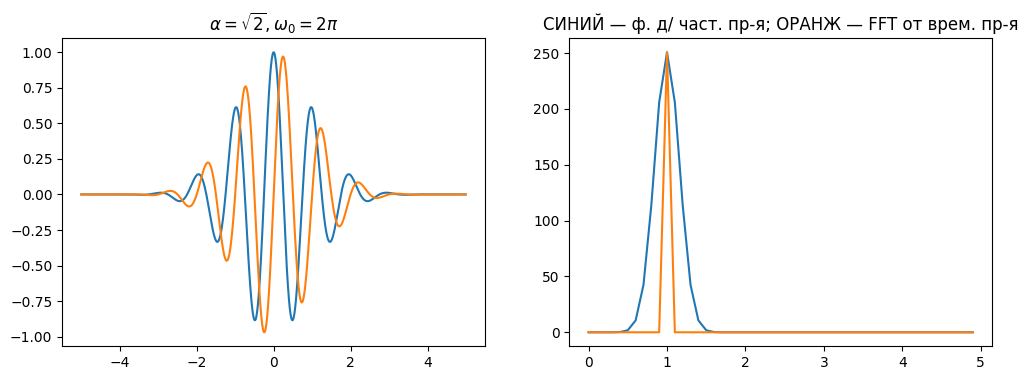

In [4]:
time = np.arange(-5, 5, 0.01)
freq = np.fft.fftfreq(len(time), 0.01)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('$\\alpha = \sqrt{2}, \omega_0 = 2\pi$')
plt.plot(time, [morlet4time(t, np.sqrt(2), 2*np.pi).real for t in time])
plt.plot(time, [morlet4time(t, np.sqrt(2), 2*np.pi).imag for t in time])

plt.subplot(1, 2, 2)
plt.title('СИНИЙ — ф. д/ част. пр-я; ОРАНЖ — FFT от врем. пр-я')
plt.plot(
    freq[0:len(freq)//20],
    np.abs(np.fft.fft([morlet4time(t, np.sqrt(2), 2*np.pi) for t in time]))[0:len(freq)//20]
)
plt.plot(
    freq[0:len(freq)//20],
    [morlet4freq(w, np.sqrt(2) / 0.01, 1) for w in freq][0:len(freq)//20]
)

plt.show()

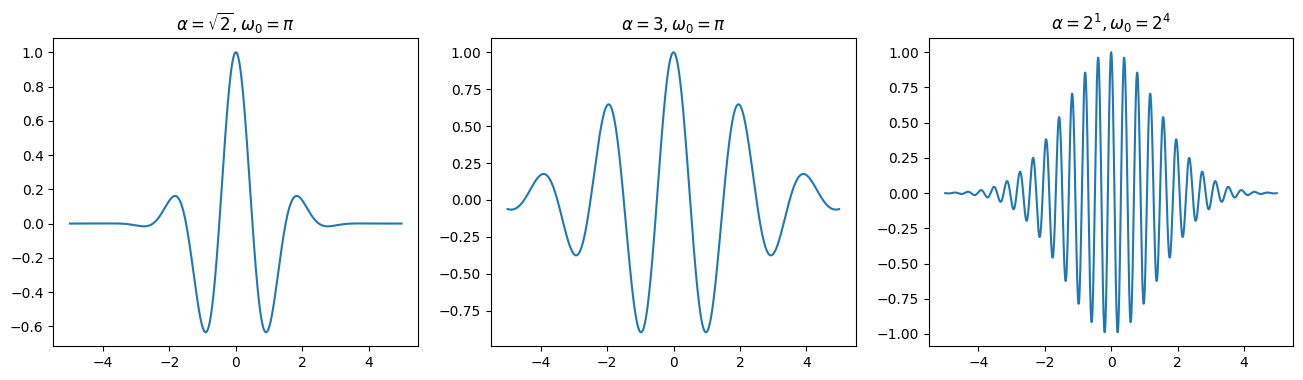

In [5]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$\\alpha = \sqrt{2}, \omega_0 = \pi$')
plt.plot(time, [morlet4time(t, np.sqrt(2), np.pi) for t in time])

plt.subplot(1, 3, 2)
plt.title('$\\alpha = 3, \omega_0 = \pi$')
plt.plot(time, [morlet4time(t, 3, np.pi) for t in time])

plt.subplot(1, 3, 3)
plt.title('$\\alpha = 2^1, \omega_0 = 2^4$')
plt.plot(time, [morlet4time(t, 2**1, 2**4) for t in time])

plt.show()

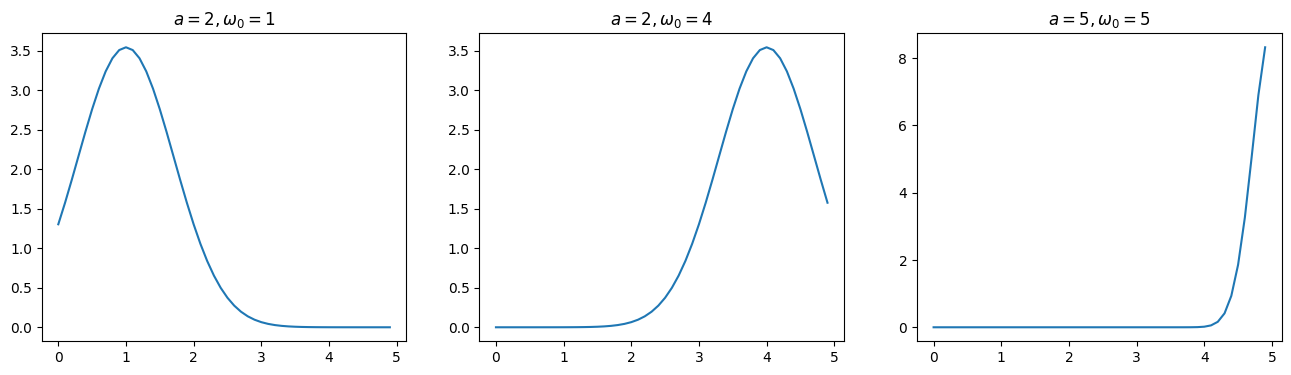

In [6]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$a = 2, \omega_0 = 1$')
plt.plot(freq[0:len(freq)//20], [morlet4freq(w, 2, 1) for w in freq][0:len(freq)//20])

plt.subplot(1, 3, 2)
plt.title('$a = 2, \omega_0 = 4$')
plt.plot(freq[0:len(freq)//20], [morlet4freq(w, 2, 4) for w in freq][0:len(freq)//20])

plt.subplot(1, 3, 3)
plt.title('$a = 5, \omega_0 = 5$')
plt.plot(freq[0:len(freq)//20], [morlet4freq(w, 5, 5) for w in freq][0:len(freq)//20])

plt.show()

**(2)** Реализовать вейвлет [Мексиканская шляпа](https://i.pinimg.com/originals/f6/da/24/f6da24b7ae3ad3f35c7cf090497a6cf3.jpg) во временном <!-- пространстве: $\large{\psi(t) = (1 - \frac{(t - t_0)^2}{\sigma^2}) * e^{- \frac{(t - t_0)^2}{2\sigma^2}} * e^{i\omega_0t}}$ И --> и в частотном пространстве: <!-- $\large{\hat{\psi}(\omega) = (\omega - \omega_0)^2 * e^{-\frac{(\omega - \omega_0)^2*\sigma^2}{2}}}$ -->

- `sigma` — стандартное отклонение $\sigma$ (пер. $2*t$)
- `t_0` — сдвиг по времени $t_0$ (если требуется)
- `w_0` — центральная частота $\omega_0$
- `np.exp(1j * w_0 * t)` — гармоническая осцилляция $e^{i*\omega_0*t}$

In [7]:
def shlyapa4time(t, sigma, t_0, w_0):
    return (1 - ((t - t_0)**2 / sigma**2)) * np.exp(-((t - t_0)**2) / (2 * sigma**2)) * np.exp(1j * w_0 * t)

In [8]:
def shlyapa4freq(w, sigma, w_0):
    return (w - w_0)**2 * np.exp(-((w - w_0)**2 * sigma**2) / 2)

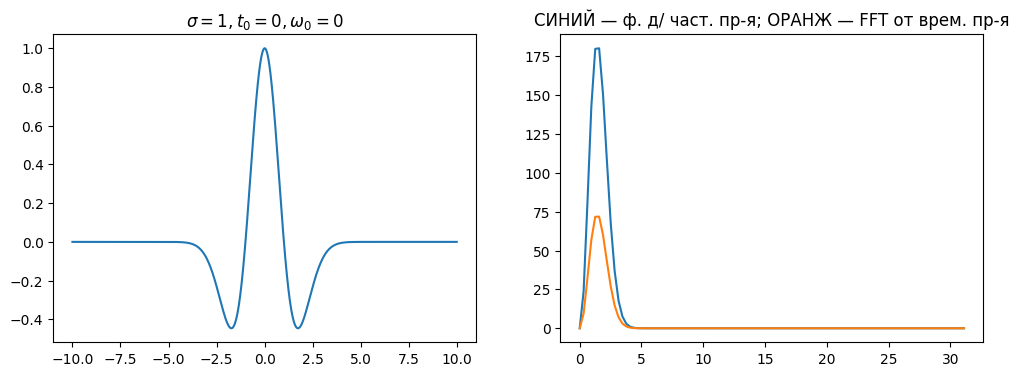

In [9]:
time = np.arange(-10, 10, 0.01)
freq = np.fft.fftfreq(len(time), 0.01) * 2 * np.pi


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('$\sigma = 1, t_0 = 0, \omega_0 = 0$')
plt.plot(time, [shlyapa4time(t, 1, 0, 0).real for t in time])
# plt.plot(time, [shlyapa4time(t, 1, 0, 0).imag for t in time])

plt.subplot(1, 2, 2)
plt.title('СИНИЙ — ф. д/ част. пр-я; ОРАНЖ — FFT от врем. пр-я')
plt.plot(
    freq[0:len(freq)//20],
    np.abs(np.fft.fft([shlyapa4time(t, 1, 0, 0) for t in time]))[0:len(freq)//20]
)
plt.plot(
    freq[0:len(freq)//20],
    [shlyapa4freq(w, 1, 0) / 0.01 for w in freq][0:len(freq)//20]
)

plt.show()

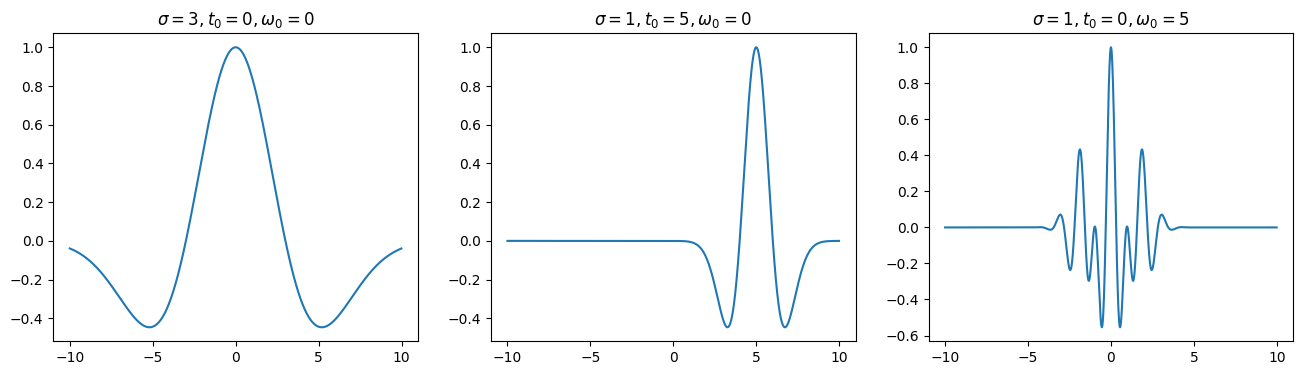

In [10]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$\sigma = 3, t_0 = 0, \omega_0 = 0$')
plt.plot(time, [shlyapa4time(t, 3, 0, 0) for t in time])

plt.subplot(1, 3, 2)
plt.title('$\sigma = 1, t_0 = 5, \omega_0 = 0$')
plt.plot(time, [shlyapa4time(t, 1, 5, 0) for t in time])

plt.subplot(1, 3, 3)
plt.title('$\sigma = 1, t_0 = 0, \omega_0 = 5$')
plt.plot(time, [shlyapa4time(t, 1, 0, 5) for t in time])

plt.show()

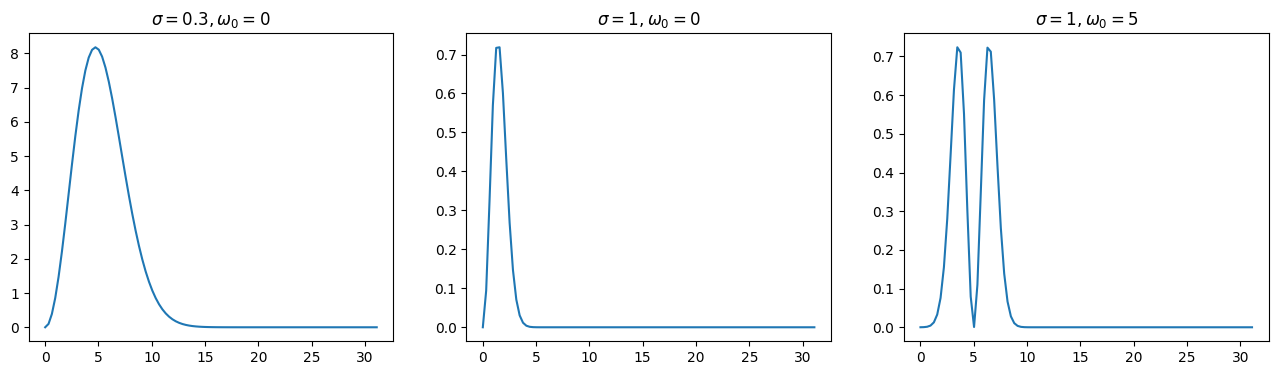

In [11]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$\sigma = 0.3, \omega_0 = 0$')
plt.plot(freq[0:len(freq)//20], [shlyapa4freq(w, 0.3, 0) for w in freq[0:len(freq)//20]])

plt.subplot(1, 3, 2)
plt.title('$\sigma = 1, \omega_0 = 0$')
plt.plot(freq[0:len(freq)//20], [shlyapa4freq(w, 1, 0) for w in freq[0:len(freq)//20]])

plt.subplot(1, 3, 3)
plt.title('$\sigma = 1, \omega_0 = 5$')
plt.plot(freq[0:len(freq)//20], [shlyapa4freq(w, 1, 5) for w in freq[0:len(freq)//20]])

plt.show()

**(3)** Реализовать вейвлет Хаара во временном <!-- тут я наконец подумал, а нафига я переписываю формулы, если они и так даны в лабе/лекции, и решил больше так не делать --> и в частотном пространстве: 

- `nu` — ширина импульса $\nu$

In [12]:
def haar4time(t, nu):
    if (0 <= t/nu) and (t/nu < 0.5):
        return 1
    elif (0.5 <= t/nu) and (t/nu < 1):
        return -1
    else:
        return 0

In [13]:
def haar4freq(w, nu):
    # return 2j * np.sin(w*nu / (2*2)) * np.exp(-(1j * w*nu) / (2*2)) <-- Похоже, в методичке снова неверная формула...
    return 1j * ((np.sin(w)**2 / 4) / (w/4)) * np.exp(1j * w / 2) * nu

/tmp/ipykernel_5317/840261560.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return 1j * ((np.sin(w)**2 / 4) / (w/4)) * np.exp(1j * w / 2) * nu


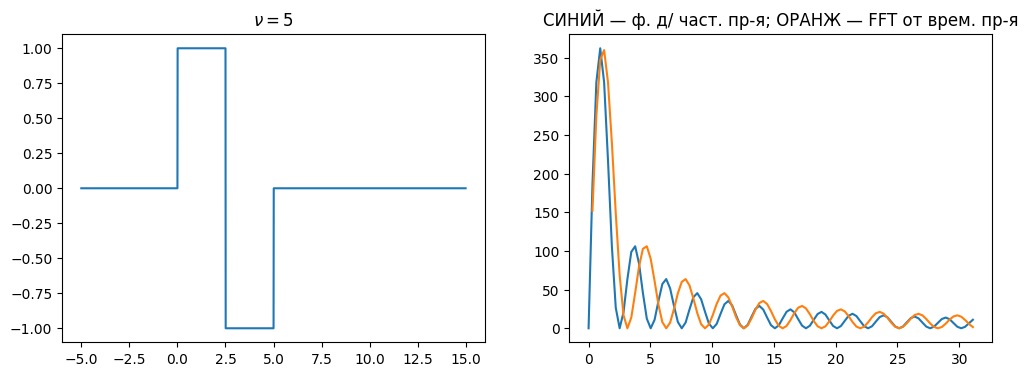

In [14]:
time = np.arange(-5, 15, 0.01)
freq = np.fft.fftfreq(len(time), 0.01) * 2 * np.pi


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('$\\nu = 5$')
plt.plot(time, [haar4time(t, 5).real for t in time])
# plt.plot(time, [haar4time(t, 5).imag for t in time])

plt.subplot(1, 2, 2)
plt.title('СИНИЙ — ф. д/ част. пр-я; ОРАНЖ — FFT от врем. пр-я')
plt.plot(
    freq[0:len(freq)//20],
    np.abs(np.fft.fft([haar4time(t, 5) for t in time]))[0:len(freq)//20]
)
plt.plot(
    freq[0:len(freq)//20],
    np.abs([haar4freq(w, 5) / 0.01 for w in freq][0:len(freq)//20])
)

plt.show()

Для изменения центральной частоты фильтрации можно прим. формулы масштабирования — если мы хотим УВЕЛИЧИТЬ центральную частоту, нужно УМЕНЬШИТЬ временной масштаб, и соответственно наоборот:

- `a` — коэф. масштабирования $a$ ($a < 1$ — вейвлет <!--скукоживается--> сжимается, цетральная частота увел.; $a > 1$ — вейвлет расширяется, ЦЧ уменьш.)

In [15]:
def haar4time_scale(t, nu, a):
    return (1 / np.sqrt(a)) * haar4time(t / a, nu)

In [16]:
def haar4freq_scale(w, nu, a):
    return np.sqrt(a) * haar4freq(a * w, nu)

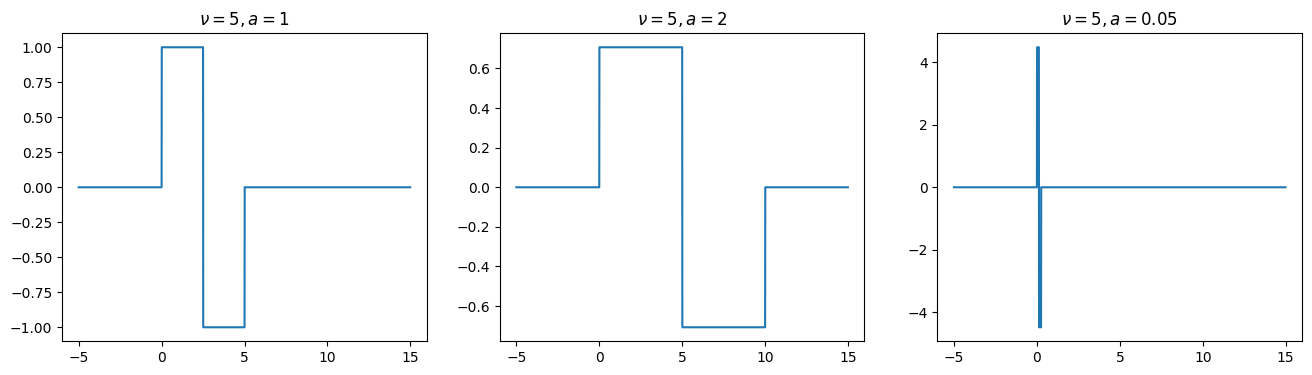

In [17]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$\\nu = 5, a = 1$')
plt.plot(time, [haar4time_scale(t, 5, 1) for t in time])

plt.subplot(1, 3, 2)
plt.title('$\\nu = 5, a = 2$')
plt.plot(time, [haar4time_scale(t, 5, 2) for t in time])

plt.subplot(1, 3, 3)
plt.title('$\\nu = 5, a = 0.05$')
plt.plot(time, [haar4time_scale(t, 5, 0.05) for t in time])

plt.show()

/tmp/ipykernel_5317/840261560.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return 1j * ((np.sin(w)**2 / 4) / (w/4)) * np.exp(1j * w / 2) * nu


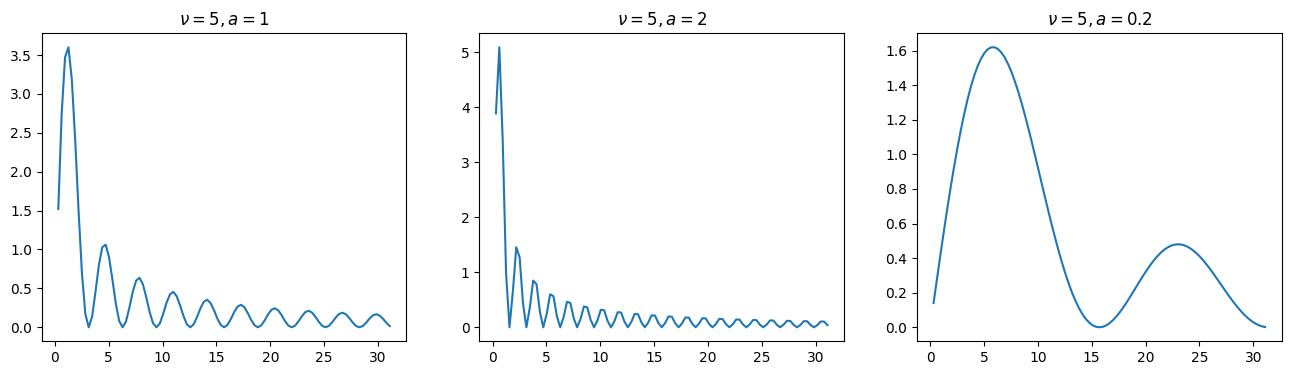

In [18]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$\\nu = 5, a = 1$')
plt.plot(freq[0:len(freq)//20], [np.abs(haar4freq_scale(w, 5, 1)) for w in freq[0:len(freq)//20]])

plt.subplot(1, 3, 2)
plt.title('$\\nu = 5, a = 2$')
plt.plot(freq[0:len(freq)//20], [np.abs(haar4freq_scale(w, 5, 2)) for w in freq[0:len(freq)//20]])

plt.subplot(1, 3, 3)
plt.title('$\\nu = 5, a = 0.2$')
plt.plot(freq[0:len(freq)//20], [np.abs(haar4freq_scale(w, 5, 0.2)) for w in freq[0:len(freq)//20]])

plt.show()

**(4)** Берём произвольный сигнал, выполняем свёртку с каждым из вейвлетов, сравниваем результаты

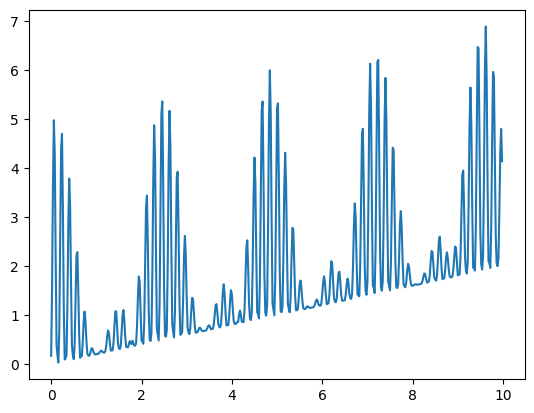

In [19]:
def signal(t, q):
    return np.abs(
        (
            np.sin(2 * np.pi * t * np.pi) +
            np.cos(2 * np.pi * t * np.e)
        ) * (
            np.sin(2 * np.pi * t * np.pi - np.e) +
            np.sin(2 * np.pi * t * np.e - np.pi)
        )**2
    ) + (t / q)

signal_time = np.arange(0, 10, 0.02)
signal_values = [signal(t, 5) for t in signal_time]

plt.plot(signal_time, signal_values)
plt.show()

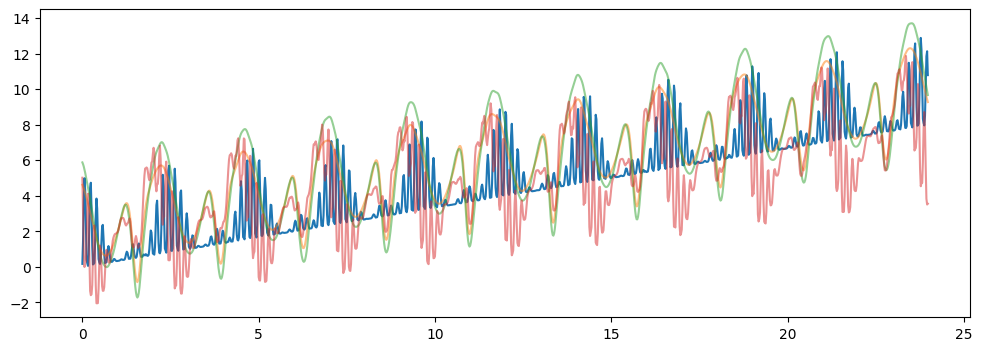

In [20]:
signal_time = np.arange(0, 30, 0.02)
signal_values = [signal(t, 3) for t in signal_time]

morlet_values = [morlet4time(t-(20/2), 0.29, 4*np.pi) for t in signal_time]
signal_morlet_conv = np.convolve(signal_values, morlet_values, mode='same')

shlyapa_values = [shlyapa4time(t, 0.13, (20/2), 1.9) for t in signal_time]
signal_shlyapa_conv = np.convolve(signal_values, shlyapa_values, mode='same')

haar_values = [haar4time_scale(t-(20/2), 0.15, 2) for t in signal_time]
signal_haar_conv = np.convolve(signal_values, haar_values, mode='same')


plt.figure(figsize=(12, 4))

plt.plot(signal_time[0:24*50], signal_values[0:24*50])
plt.plot(signal_time[0:24*50], signal_morlet_conv[0:24*50], alpha=0.5)
plt.plot(signal_time[0:24*50], signal_shlyapa_conv[0:24*50], alpha=0.5)
plt.plot(signal_time[0:24*50], signal_haar_conv[0:24*50], alpha=0.5)

plt.show()

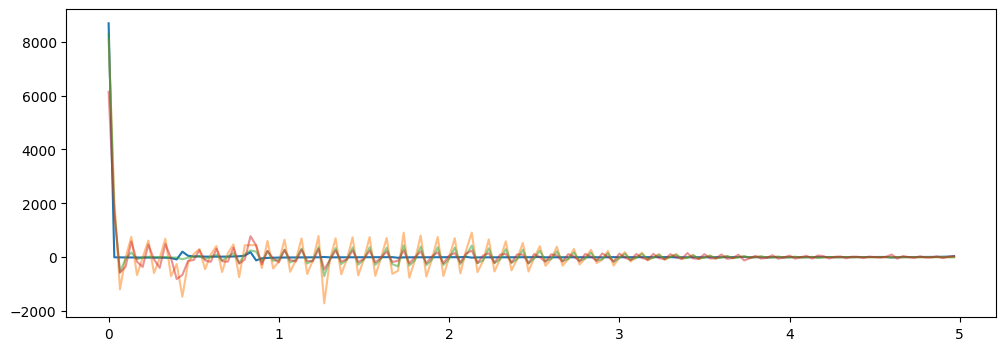

In [21]:
signal_freq = np.fft.fftfreq(len(signal_time), 0.02)
signal_fft = np.fft.fft(signal_values)

morlet_fft = np.fft.fft(morlet_values)
signal_morlet_conv_fft = np.multiply(signal_fft, morlet_fft)

shlyapa_fft = np.fft.fft(shlyapa_values)
signal_shlyapa_conv_fft = np.multiply(signal_fft, shlyapa_fft)

haar_fft = np.fft.fft(haar_values)
signal_haar_conv_fft = np.multiply(signal_fft, haar_fft)


plt.figure(figsize=(12, 4))

plt.plot(signal_freq[0:len(signal_freq)//10], signal_fft[0:len(signal_freq)//10])
plt.plot(signal_freq[0:len(signal_freq)//10], signal_morlet_conv_fft[0:len(signal_freq)//10], alpha=0.5)
plt.plot(signal_freq[0:len(signal_freq)//10], signal_shlyapa_conv_fft[0:len(signal_freq)//10], alpha=0.5)
plt.plot(signal_freq[0:len(signal_freq)//10], signal_haar_conv_fft[0:len(signal_freq)//10], alpha=0.5)

plt.show()

**(5)** Построить изменяющийся со временем сигнал, вычислить свёртку с фильром Морле, выполнить визуализации.

In [22]:
def time_changing_signal(t, T, k):
    return np.cos(np.abs(t-T)**k)

In [23]:
def conv_spectrogram(time, signal, freqs, wavelets):
    spectrogram_values = np.zeros((len(freqs), len(time)))

    for idx, wavelet in enumerate(wavelets):
        spectrogram_values[idx] = np.convolve(signal, wavelet, mode='full')[0:len(time)]

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(time, signal)

    plt.subplot(2, 1, 2)
    plt.contourf(time, freqs, np.abs(spectrogram_values), levels=100, cmap='jet')
    # plt.colorbar()
    
    plt.show()

/tmp/ipykernel_5317/2733182892.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrogram_values[idx] = np.convolve(signal, wavelet, mode='full')[0:len(time)]


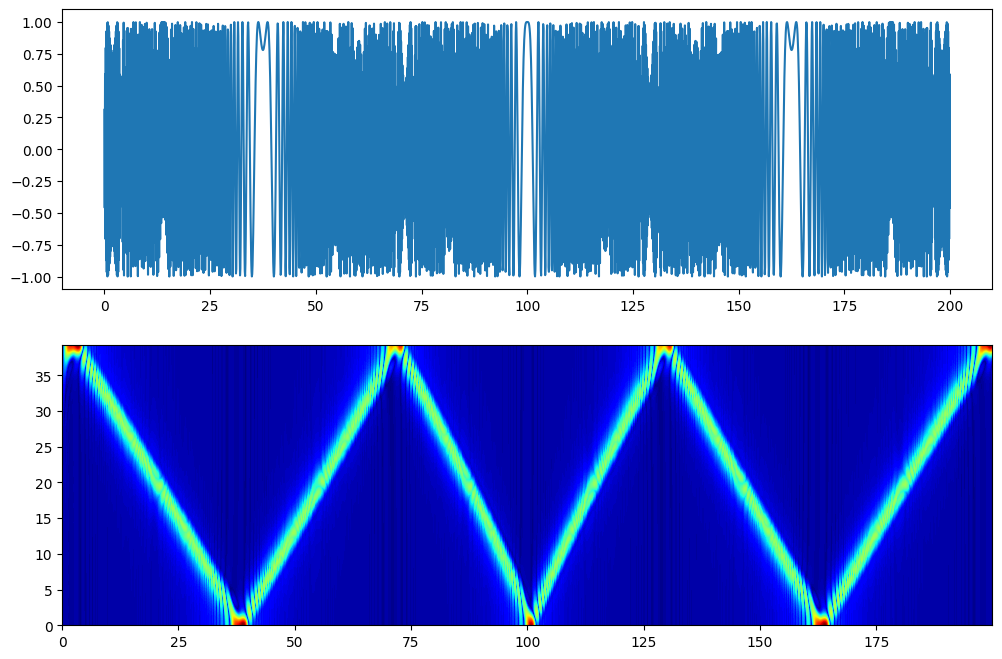

In [24]:
c = 0.08 # Принадлежит (0; 0.1], дальше надо двигать T в параметрах
         # ф-ии, чтобы она покрывала 0, иначе некорректная обрезка!

tcsignal_time = np.arange(0, 100*2, c)
# tcsignal_values = [signal(t, 8) for t in tcsignal_time]
tcsignal_values = [time_changing_signal(t, 100, 1.9) for t in tcsignal_time]

morlet_freq = np.arange(0, np.pi / c, 0.1) # <-- Обрезка добавочных
morlet_values = np.array([morlet4time(tcsignal_time, np.sqrt(2), f) for f in morlet_freq])
conv_spectrogram(tcsignal_time, tcsignal_values, morlet_freq, morlet_values)

# shyapa_freq = np.arange(0, np.pi / c, 0.1) # <-- Обрезка добавочных
# shyapa_values = np.array([shlyapa4time(tcsignal_time, f, 0, 0) for f in shyapa_freq])
# conv_spectrogram(tcsignal_time, tcsignal_values, shyapa_freq, shyapa_values)

**(6)** Скачайте с интернета любой аудио файл, постройте для него три спектрограммы
используя вейвлет Морле, вейвлет Хаара и вейвлет Мексиканская шляпа. Объясните результаты.

<!-- Убедитесь, что Ваш алгоритм работает правильно, для этого скачайте аудио звук
любой чистой ноты и постройте для него три спектрограммы используя вейвлет
Морле, вейвлет Хаара и вейвлет Мексиканская шляпа. Например, для ноты “ля”
1-й октавы основная гармоника должна соответствовать 440 Гц. -->

In [25]:
# https://stackoverflow.com/questions/15311853/plot-spectogram-from-mp3

def mus2data(filename):
    # Читаем mp3, временно конвертируем в wav
    mp3_audio = AudioSegment.from_file(filename, format="mp3")
    wav_temp = open('temp.wav', 'wb')
    mp3_audio.export(wav_temp, format="wav")
    wav_temp.close()

    # Прочитываем временный wav и удаляем его
    wav_temp = open('temp.wav', 'rb')
    fs, data = wavfile.read(wav_temp)
    wav_temp.close()
    !rm 'temp.wav'

    # Стерео --> Моно
    if (len(data.shape) > 1) and (data.shape[1] > 1):
        data = data[:, 1]

    return fs, data

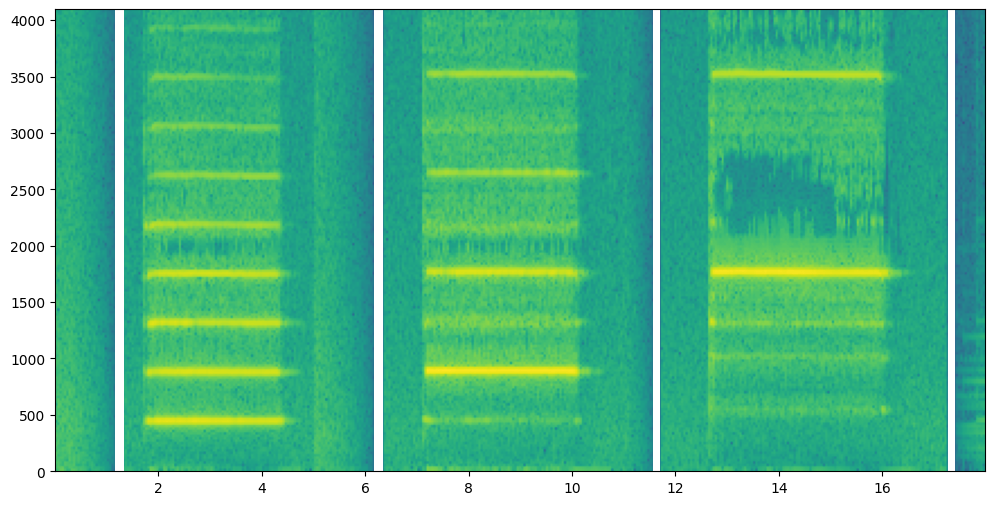

In [26]:
mus_fs, mus_data = mus2data('a123.mp3')

plt.figure(figsize=(12, 6))

plt.specgram(mus_data, Fs=mus_fs, NFFT=2048)
# plt.xlim(0, 10)
plt.ylim(0, 4096)

plt.show()

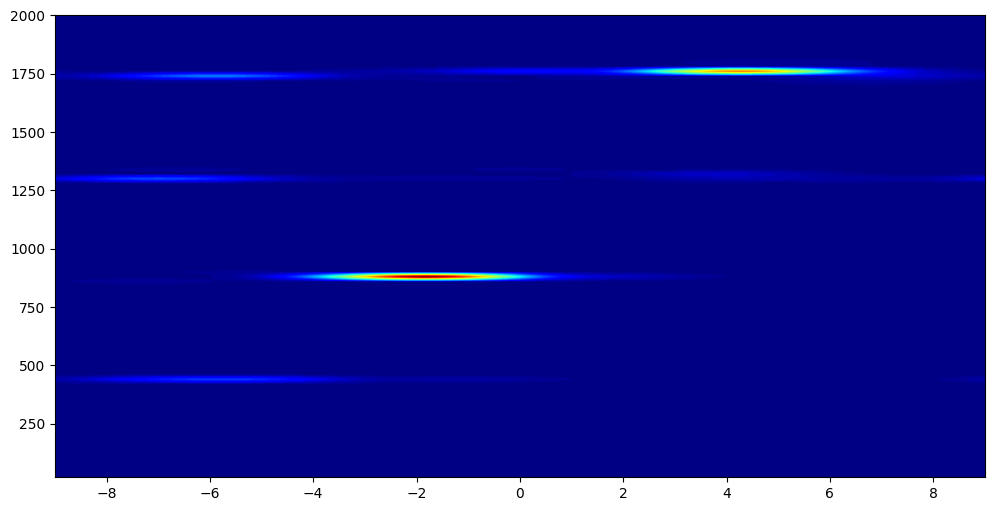

In [28]:
mus_time = np.arange(-len(mus_data)//2, len(mus_data)//2) / mus_fs # Делаем сдвиг как ранее
mus_freq = np.linspace(20, 2000, 100)
signal_fft = np.fft.fft(mus_data, n=len(mus_data))

# Делать свёртку через np.convole выходит невероятно долго,
# поэтому по теореме о свёртке сделаем перемножение FFT
# ядра и сигнала, и переведём обратно по временную область:
wavelet_matrix_fft = np.zeros((len(mus_freq), len(mus_data)), dtype=np.complex_)

for i, f in enumerate(mus_freq):
    wavelet = morlet4time(mus_time, 2, 2*np.pi*f)
    wavelet_matrix_fft[i, :] = np.fft.fft(wavelet, n=len(mus_data))

spectrogram = np.zeros((len(mus_freq), len(mus_data)))

for i, wavelet_fft in enumerate(wavelet_matrix_fft):
    conv_result_fft = signal_fft * wavelet_fft
    conv_result = np.abs(np.fft.ifft(conv_result_fft))
    spectrogram[i, :] = np.fft.fftshift(conv_result) # Обязательно делаем сдвиг


plt.figure(figsize=(12, 6))

plt.contourf(mus_time, mus_freq, spectrogram, levels=100, cmap='jet')

plt.show()

*(ну а делать другие фильтры мне лень, да и мне без них уже зачли… думойте)*

<!-- 6:24 AM :C -->